<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Hands-on Lab: Complete the EDA with Visualization


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. 

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


Install the below libraries


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [5]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [8]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [91]:
df.shape

(90, 19)

Primero, intentemos ver cómo las variables `FlightNumber` (que indica los intentos de lanzamiento continuos) y `Payload` afectarían el resultado del lanzamiento.

#### Podemos representar gráficamente el <code>FlightNumber</code> frente a la <code>PayloadMass</code> y superponer el resultado del lanzamiento. Vemos que a medida que aumenta el número de vuelo, es más probable que la primera etapa aterrice con éxito. La masa de la carga útil también es importante; parece que cuanto más masiva sea la carga útil, menos probable es que la primera etapa regrese.

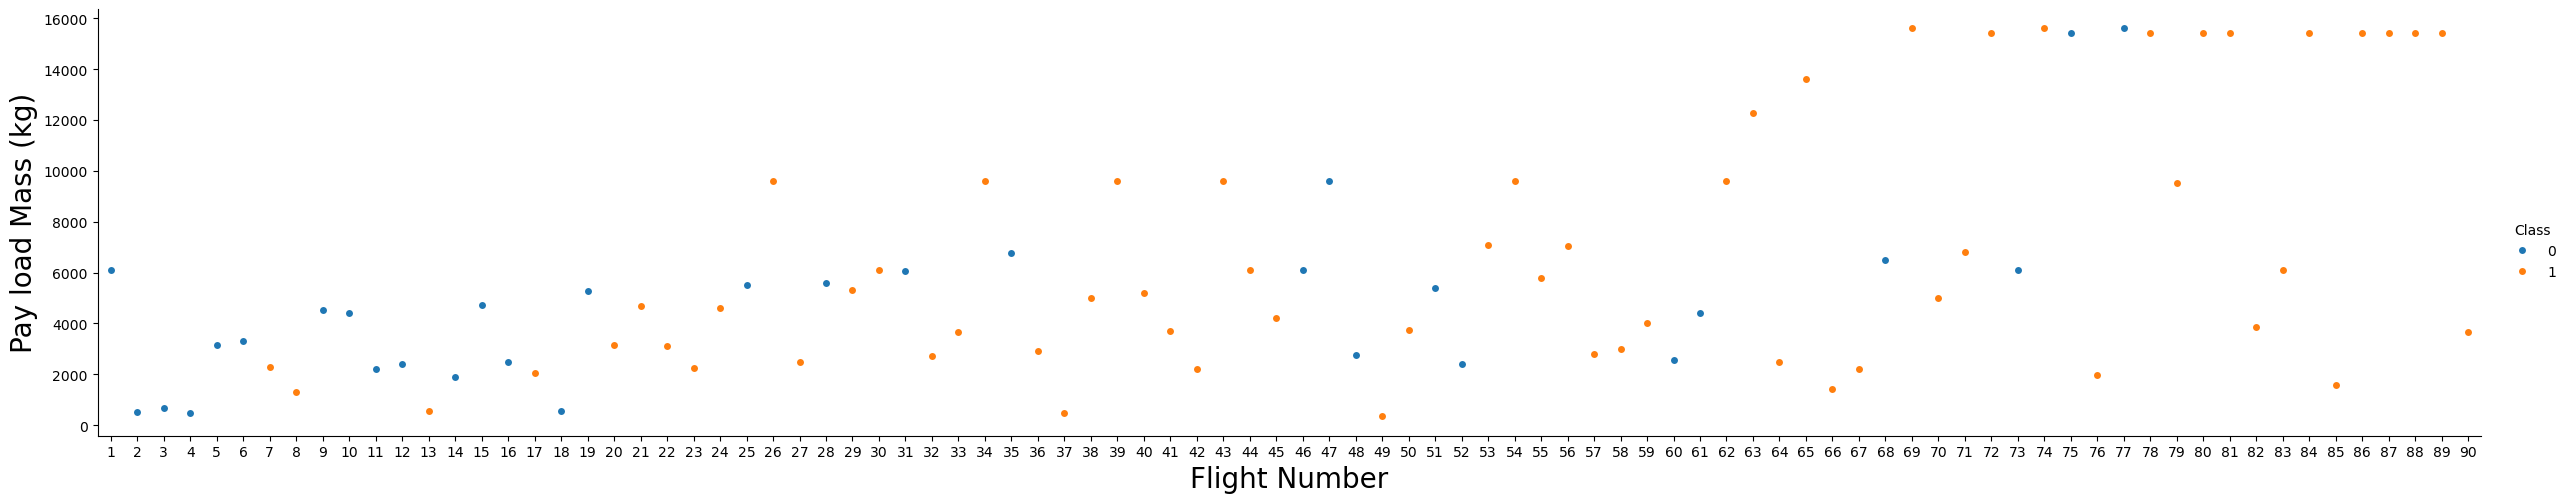

In [11]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

#### A continuación, analicemos en profundidad cada sitio para visualizar sus registros de lanzamiento detallados.

### TAREA 1: Visualizar la relación entre el número de vuelo y el lugar de lanzamiento

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


#### Utilice la función <code>catplot</code> para trazar <code>FlightNumber</code> vs <code>LaunchSite</code>, establezca el parámetro <code>x</code> en <code>FlightNumber</code>, establezca <code>y</code> en <code>Launch Site</code> y establezca el parámetro <code>hue</code> en <code>'class'</code>

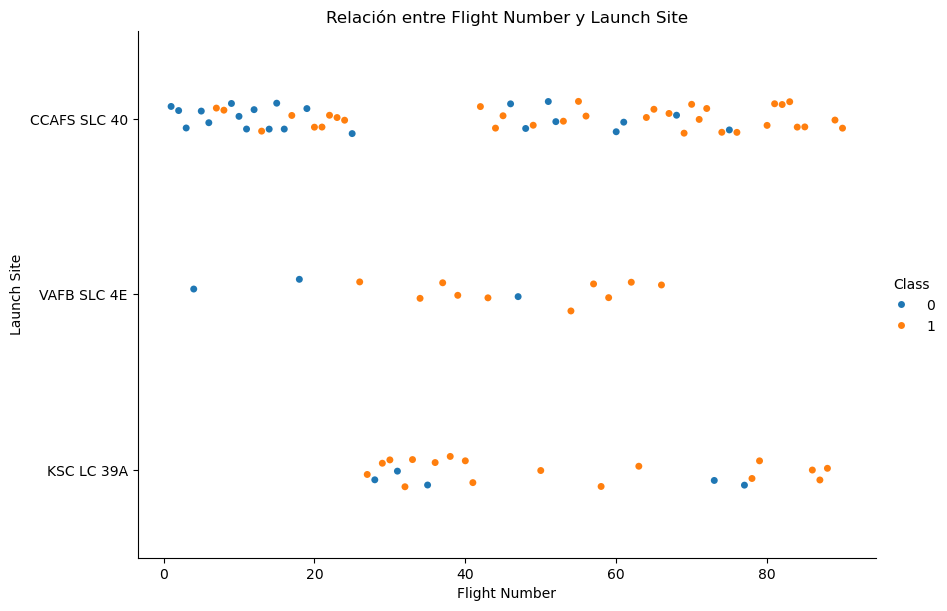

In [18]:
# Dibuje un gráfico de puntos de dispersión con el eje x como número de vuelo, el eje y como sitio de lanzamiento y el tono como valor de clase.
# Configurar el gráfico usando catplot
sns.catplot(
    data=df,               # DataFrame de entrada
    x='FlightNumber',      # Eje X: FlightNumber
    y='LaunchSite',       # Eje Y: Launch Site
    hue='Class',           # Color basado en la variable 'Class'
    kind='strip',          # Tipo de gráfico
    height=6,              # Altura del gráfico
    aspect=1.5             # Relación de aspecto
)

# Personalizar el título del gráfico
plt.title("Relación entre Flight Number y Launch Site")
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")

# Mostrar el gráfico
plt.show()


#### Ahora intenta explicar los patrones que encontraste en los gráficos de puntos de dispersión del número de vuelo frente al sitio de lanzamiento.

### TAREA 2: Visualizar la relación entre la carga útil y el sitio de lanzamiento

#### También queremos observar si existe alguna relación entre los sitios de lanzamiento y la masa de su carga útil.

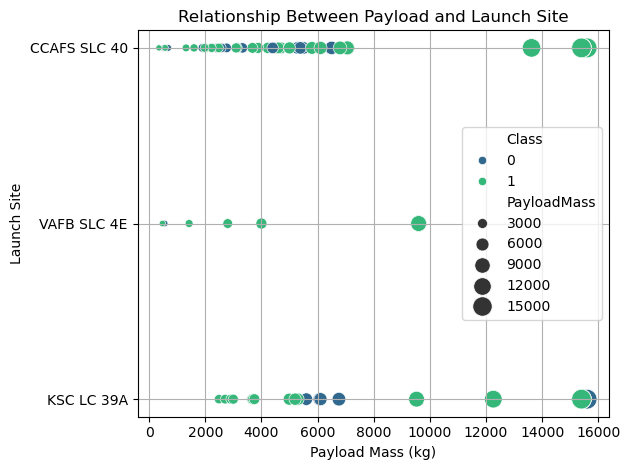

In [24]:
# Dibuje un diagrama de puntos de dispersión con el eje x como masa de carga útil (kg) y el eje y como sitio de lanzamiento, y el tono como valor de clase.

# Crear el gráfico de dispersión con seaborn
sns.scatterplot(
    data=df,
    x='PayloadMass',
    y='LaunchSite',
    hue='Class',  # Diferenciar con colores según el éxito del lanzamiento
    size='PayloadMass',  # Ajustar tamaño de puntos según la masa de carga útil
    sizes=(20, 200),  # Escala de los puntos
    palette='viridis'  # Elegir una paleta de colores
)

# Configurar título y etiquetas
plt.title('Relationship Between Payload and Launch Site')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).

#### Ahora, si observa el gráfico de puntos de dispersión de carga útil versus lugar de lanzamiento, encontrará que para el sitio de lanzamiento VAFB-SLC no se lanzaron cohetes con una masa de carga útil pesada (superior a 10 000).

### TAREA 3: Visualizar la relación entre la tasa de éxito de cada tipo de órbita

#### A continuación, queremos comprobar visualmente si existe alguna relación entre la tasa de éxito y el tipo de órbita.

#### Creemos un "gráfico de barras" para la tasa de éxito de cada órbita.

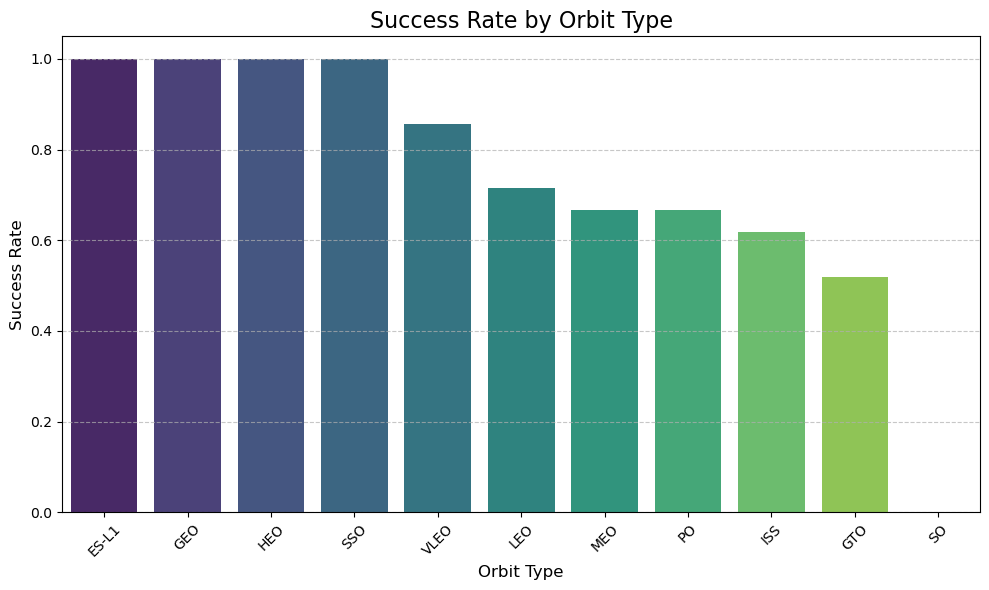

In [31]:
# SUGERENCIA: use el método groupby en la columna Órbita y obtenga la media de la columna Clase

# Agrupar datos por 'Órbita' y calcular la tasa de éxito
orbit_success_rate = df.groupby('Orbit')['Class'].mean().reset_index()

# Ordenar para una mejor visualización
orbit_success_rate = orbit_success_rate.sort_values(by='Class', ascending=False)

# Trazando el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=orbit_success_rate, x='Orbit', y='Class', palette='viridis')

#Añadir títulos y etiquetas
plt.title('Success Rate by Orbit Type', fontsize=16)
plt.xlabel('Orbit Type', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la trama
plt.tight_layout()
plt.show()


#### Analice el gráfico de barras trazado e intente encontrar qué orbital tiene una alta tasa de éxito.

### TAREA 4: Visualizar la relación entre FlightNumber y el tipo de órbita

#### Para cada órbita, queremos ver si existe alguna relación entre el número de vuelo y el tipo de órbita.

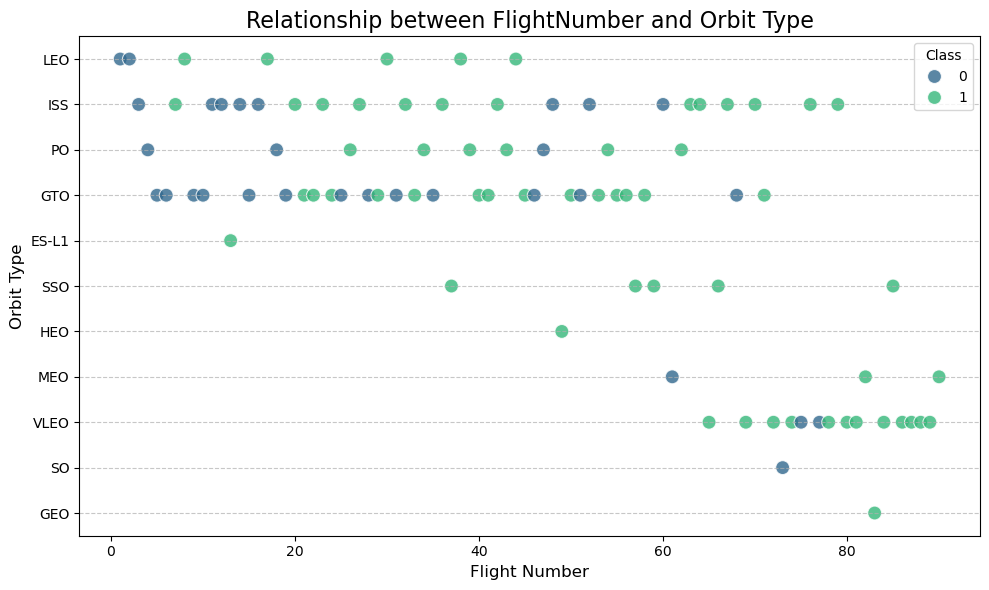

In [37]:
# Dibuje un gráfico de puntos de dispersión con el eje x como FlightNumber y el eje y como la órbita, y el tono como el valor de la clase

# Diagrama de dispersión para FlightNumber vs. Orbit
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='FlightNumber',
    y='Orbit',
    hue='Class',
    palette='viridis',
    s=100,  # Ajustar el tamaño de los puntos de dispersión
    alpha=0.8
)

#Añadir títulos y etiquetas
plt.title('Relationship between FlightNumber and Orbit Type', fontsize=16)
plt.xlabel('Flight Number', fontsize=12)
plt.ylabel('Orbit Type', fontsize=12)
plt.legend(title='Class', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la trama
plt.tight_layout()
plt.show()

#### Deberías ver que en la órbita LEO el Éxito aparece relacionado con el número de vuelos; por otro lado, no parece haber relación entre el número de vuelos cuando está en órbita GTO.

### TAREA 5: Visualizar la relación entre la carga útil y el tipo de órbita

#### De manera similar, podemos trazar los gráficos de puntos de dispersión de carga útil vs. órbita para revelar la relación entre la carga útil y el tipo de órbita.

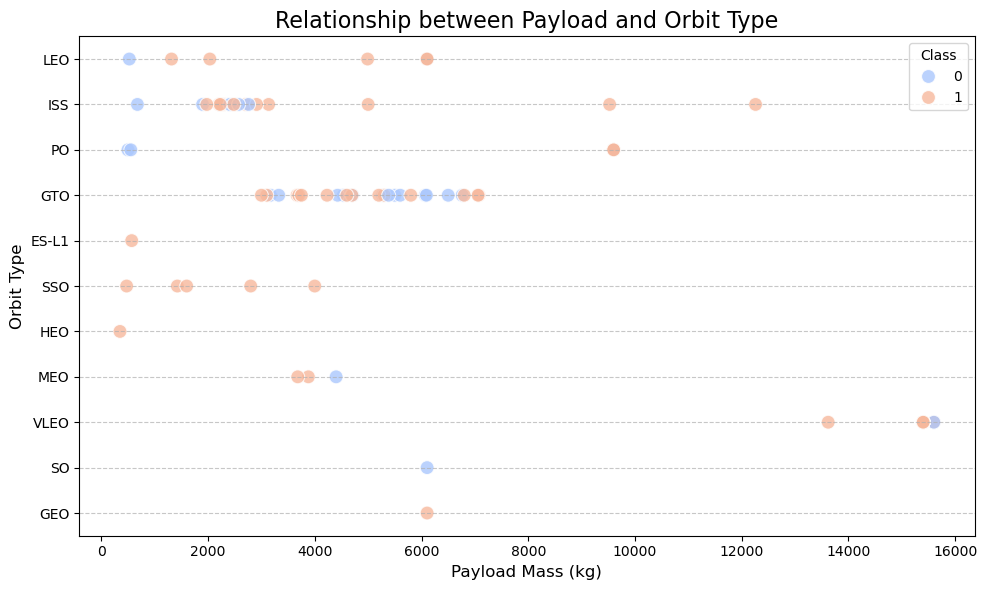

In [53]:
# Dibuje un gráfico de puntos de dispersión con el eje x como carga útil y el eje y como órbita, y el tono como valor de clase

# Diagrama de dispersión para la masa de carga útil frente a la órbita
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='PayloadMass',
    y='Orbit',
    hue='Class',
    palette='coolwarm',
    s=100,  # Ajustar el tamaño de los puntos de dispersión
    alpha=0.8
)

#Añadir títulos y etiquetas
plt.title('Relationship between Payload and Orbit Type', fontsize=16)
plt.xlabel('Payload Mass (kg)', fontsize=12)
plt.ylabel('Orbit Type', fontsize=12)
plt.legend(title='Class', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la trama
plt.tight_layout()
plt.show()

#### Con cargas útiles pesadas, el aterrizaje exitoso o la tasa de aterrizaje positiva son mayores para la misión Polar, LEO e ISS.

#### Sin embargo, para GTO no podemos distinguir esto bien, ya que tanto la tasa de aterrizaje positiva como el aterrizaje negativo (misión fallida) están presentes aquí.


### TAREA 6: Visualizar la tendencia anual de éxito del lanzamiento

#### Puede trazar un gráfico de líneas con el eje x como Año y el eje y como tasa de éxito promedio, para obtener la tendencia de éxito de lanzamiento promedio.

#### La función te ayudará a obtener el año a partir de la fecha:

In [60]:
# Una función para extraer años de la fecha
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

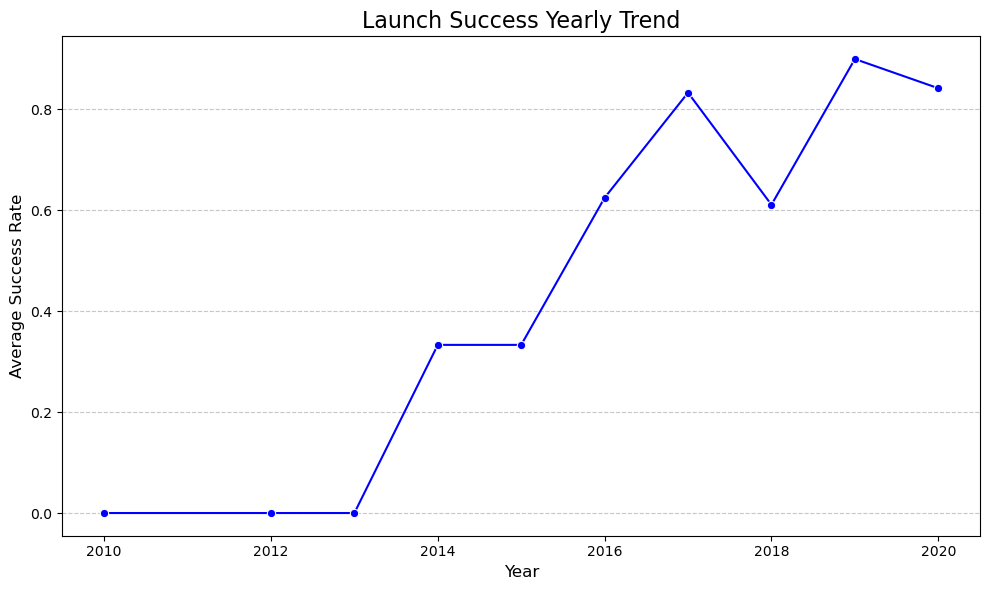

In [63]:
# Dibuje un gráfico de líneas con el eje x como el año extraído y el eje y como la tasa de éxito

# Una función para extraer años de la fecha
def Extract_year():
    year = []
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
# Agregar una nueva columna 'Año' al marco de datos
df['Year'] = Extract_year()

# Calcular la tasa de éxito promedio para cada año
success_rate_yearly = df.groupby('Year')['Class'].mean().reset_index()

# Convertir año a entero para una mejor clasificación
success_rate_yearly['Year'] = success_rate_yearly['Year'].astype(int)

# Dibuje el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=success_rate_yearly,
    x='Year',
    y='Class',
    marker='o',
    color='blue'
)

#Añadir títulos y etiquetas
plt.title('Launch Success Yearly Trend', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Success Rate', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la trama
plt.tight_layout()
plt.show()

#### Se puede observar que la tasa de éxito desde 2013 siguió aumentando hasta 2017 (estable en 2014) y después de 2015 comenzó a aumentar.

## Características Ingeniería

#### A esta altura, ya debería tener algunas ideas preliminares sobre cómo cada variable importante afectaría la tasa de éxito; seleccionaremos las características que se utilizarán en la predicción del éxito en el módulo futuro.

In [68]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TAREA 7: Crear variables ficticias para columnas categóricas

Utilice la función <code>get_dummies</code> y el marco de datos <code>features</code> para aplicar OneHotEncoder a las columnas <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code> y <code>Serial</code>. Asigne el valor a la variable <code>features_one_hot</code> y muestre los resultados utilizando el método head. El marco de datos de resultados debe incluir todas las funciones, incluidas las codificadas.

In [73]:
# SUGERENCIA: Use la función get_dummies() en las columnas categóricas
# Columnas para codificar
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Aplicar OneHotEncoder a las columnas especificadas
features_one_hot = pd.get_dummies(df, columns=categorical_columns)

# Mostrar las primeras filas del marco de datos resultante
features_one_hot.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,2010-06-04,Falcon 9,6104.959412,None None,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2,2012-05-22,Falcon 9,525.000000,None None,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0
2,3,2013-03-01,Falcon 9,677.000000,None None,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0
3,4,2013-09-29,Falcon 9,500.000000,False Ocean,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0
4,5,2013-12-03,Falcon 9,3170.000000,None None,1,False,False,False,1.0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
features_one_hot.shape


(90, 87)

### TAREA 8: Convertir todas las columnas numéricas a `float64`

#### Ahora que nuestro marco de datos <code>features_one_hot</code> solo contiene números, convierte todo el marco de datos al tipo de variable <code>float64</code>

In [78]:
# SUGERENCIA: use la función astype

# Identificar columnas no numéricas
non_numeric_columns = features_one_hot.select_dtypes(include=['object']).columns
print("Columnas no numéricas:", non_numeric_columns)

# Eliminar columnas no numéricas
features_one_hot_numeric = features_one_hot.drop(columns=non_numeric_columns)

# Convertir las columnas restantes a float64
features_one_hot_numeric = features_one_hot_numeric.astype('float64')

# Verificar que todas las columnas ahora sean float64
print(features_one_hot_numeric.dtypes)

Columnas no numéricas: Index(['Date', 'BoosterVersion', 'Outcome', 'Year'], dtype='object')
FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 83, dtype: object


#### Ahora podemos exportarlo a un <b>CSV</b> para la siguiente sección, pero para que las respuestas sean consistentes, en el próximo laboratorio proporcionaremos datos en un rango de fechas preseleccionado.

<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


In [83]:
# Exportar el DataFrame a un archivo CSV
features_one_hot.to_csv('dataset_part_3.csv', index=False)

print("El archivo 'dataset_part_3.csv' ha sido creado con éxito.")

El archivo 'dataset_part_3.csv' ha sido creado con éxito.


In [85]:
total_columns = features_one_hot.shape[1]
print(f"The total number of columns is: {total_columns}")

The total number of columns is: 87


## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
